In [1]:
# Time series analysis - using ARIMA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# statsmodels library has support for time series analysis
from statsmodels.tsa.arima_model import ARIMA
# pmdarima implements (Auto) ARIMA models and SARIMA (Seasonal ARIMA)
from pmdarima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [2]:
# we will use passengaer numbers dataset
df = pd.read_csv('./data/AirPassengers.csv')
display(df.head())

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# we can plot the data using df.plot()
df.plot()

In [4]:
# convert data frame into a timeseries df
df['datetime']= pd.to_datetime(df['Month'])
df.set_index('datetime',inplace=True)
df.drop(columns=['Month'],inplace=True)
df = df.asfreq('M', method='ffill')

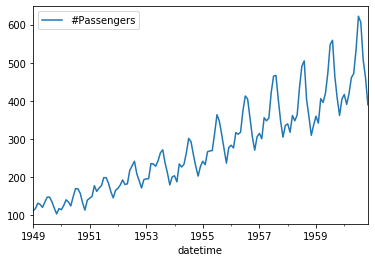

In [5]:
# plot the Time series data frame (note the x-axis is now problem date)
df.plot()

In [9]:
# Fit auto_arima function to AirPassengers dataset 
# Auto ARIMA estima ARIMA model parameters to achieve optima performance
# ARIMA models are specified with three parameters (p,d,q)
# start_p, max_p: number of time lags of the auto-regressive (“AR”) model. Must be a positive integer.
# d: The order of first-differencing. default: none (will be calcultaed by the model)
# start_q, max_q: the order of the moving-average (“MA”) model. Must be a positive integer.
# SARIMA has also another three corresponding parametrs (P,D,Q) 
#    & m: The number of time steps for a single seasonal period.
stepwise_fit = auto_arima(df['#Passengers'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = False, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 

In [7]:
# To print the summary 
stepwise_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  143
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -499.963
Date:                             Fri, 22 May 2020   AIC                           1009.927
Time:                                     16:09:52   BIC                           1024.264
Sample:                                          0   HQIC                          1015.753
                                             - 143                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0456      0.030      1.495      0.135      -0.014       0.105
ar.L1          0.5666      0.096      5.925      0.000       0.379       0.754
ar.L2          0.2108      0.086      2.448      0.014       0.042       0.380
ma.L1         -0.9998      5.383     -0.186      0.853     -11.550       9.550
sigma2       125.5512    669.852      0.187      0.851   -1187.335    1438.437
===================================================================================
Ljung-Box (Q):                       46.09   Jarque-Bera (JB):                 7.63
Prob(Q):                              0.23   Prob(JB):                         0.02
Heteroskedasticity (H):               2.38   Skew:                            -0.12
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# Split data into train / test sets 
train = df.iloc[:len(df)-12] 
test = df.iloc[len(df)-12:] # set one year(12 months) for testing 

# Fit a SARIMAX(0, 1, 1)x(2, 1, 0, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['#Passengers'],  
                order = (2, 1, 1),  
                seasonal_order =(2, 1, 0, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                  131
Model:             SARIMAX(2, 1, 1)x(2, 1, [], 12)   Log Likelihood                -441.168
Date:                             Fri, 22 May 2020   AIC                            894.336
Time:                                     16:24:37   BIC                            910.960
Sample:                                 01-31-1949   HQIC                           901.086
                                      - 11-30-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5774      1.003     -0.576      0.565      -2.543       1.388
ar.L2         -0.0066      0.328     -0.020      0.984      -0.650       0.637
ma.L1          0.3185      1.012      0.315      0.753      -1.664       2.301
ar.S.L12      -0.0712      0.088     -0.805      0.421      -0.245       0.102
ar.S.L24       0.1657      0.100      1.654      0.098      -0.031       0.362
sigma2       102.7470     14.264      7.203      0.000      74.789     130.705
===================================================================================
Ljung-Box (Q):                       42.30   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.37   Prob(JB):                         0.77
Heteroskedasticity (H):               1.55   Skew:                            -0.10
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

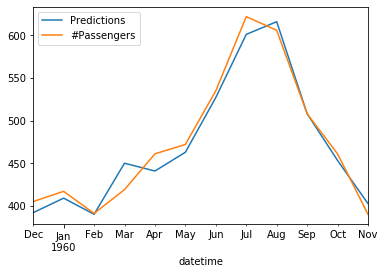

In [13]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['#Passengers'].plot(legend = True) 